<a href="https://colab.research.google.com/github/SuparnoB/EDA_Canada_Temp/blob/main/EDA_Temp_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt # creating subplots and formating figures
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [72]:
data = pd.read_csv("/content/city_temperature.csv") 

In [73]:
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [75]:
data.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [76]:
data.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [77]:
print("INITIAL OBSERVATIONS:")
print(f"1. DISTINCT REGIONS - LIST: {data['Region'].unique()} \
      COUNT: {len(data['Region'].unique())}")
print(f"2. DISTINCT COUNTRIES - LIST: {data['Country'].unique()} \
      COUNT:{len(data['Country'].unique())}")
#Clean-up odd values in DAY and Year Columns
data = data.drop(data[data['Day']==0].index)
data = data.reset_index(drop=True)
data = data.drop(data[data['Year']==200].index)
data = data.reset_index(drop=True)
data = data.drop(data[data['Year']==201].index)
data = data.reset_index(drop=True)
#Clean-up odd values in AvgTemperature
data = data.drop(data[data['AvgTemperature']==-99].index)
data['Date'] = pd.to_datetime(data[['Year','Month','Day']])
print(data['Date'])

INITIAL OBSERVATIONS:
1. DISTINCT REGIONS - LIST: ['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']       COUNT: 7
2. DISTINCT COUNTRIES - LIST: ['Algeria' 'Burundi' 'Benin' 'Central African Republic' 'Congo' 'Egypt'
 'Ethiopia' 'Gabon' 'Gambia' 'Guinea' 'Guinea-Bissau' 'Ivory Coast'
 'Kenya' 'Morocco' 'Madagascar' 'Mauritania' 'Malawi' 'Mozambique'
 'Namibia' 'Nigeria' 'Senegal' 'Sierra Leone' 'South Africa' 'Togo'
 'Tunisia' 'Tanzania' 'Uganda' 'Zambia' 'Bangladesh' 'China' 'Hong Kong'
 'India' 'Indonesia' 'Japan' 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Malaysia'
 'Mongolia' 'Myanmar (Burma)' 'Nepal' 'North Korea' 'Pakistan'
 'Philippines' 'Singapore' 'South Korea' 'Sri Lanka' 'Taiwan' 'Tajikistan'
 'Thailand' 'Turkmenistan' 'Uzbekistan' 'Vietnam' 'Australia'
 'New Zealand' 'Albania' 'Austria' 'Belarus' 'Belgium' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Georgia' 'Greece' 'H

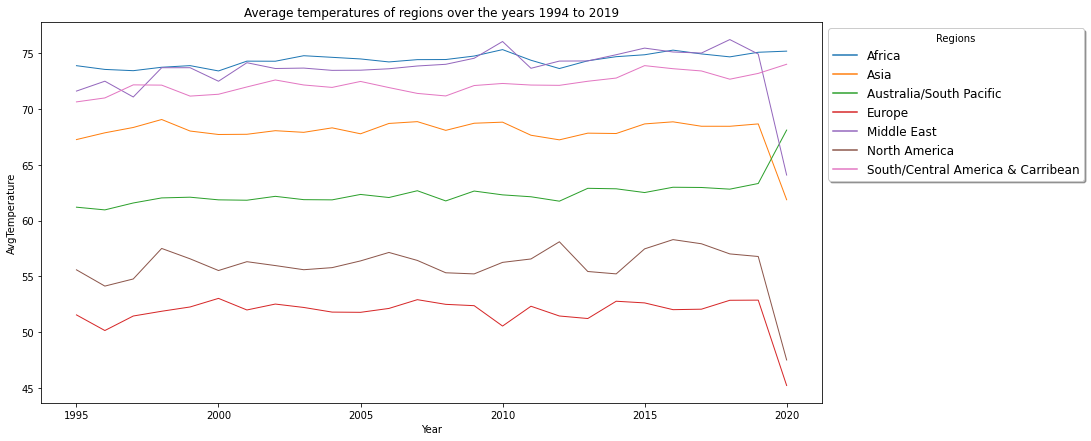

In [78]:
region = data[['Region', 'Year', 'AvgTemperature']].groupby(['Region', 'Year']).mean()
plt.figure(figsize = (14, 7))
plt.title('Average temperatures of regions over the years 1994 to 2019')
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Region', units = 'Region', markers = True, dashes = False, estimator = None, lw = 1, data = region)
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large', title = 'Regions')
plt.show()

In [79]:
data_df = data[['Country','Year','AvgTemperature']].groupby(['Country','Year']).mean().reset_index()
px.choropleth(data_frame=data_df,locations="Country",locationmode='country names',animation_frame="Year",color='AvgTemperature',color_continuous_scale = 'Turbo',title="Average temperature of countries over the years 1995 to 2019")

In [80]:
data1 = data.sort_values(by = ['AvgTemperature'], ascending  = False).head(1)
data2 = data.sort_values(by = ['AvgTemperature'], ascending = True).head(1)
hl_data = pd.concat([data1, data2])
hl_data.index = ['Highest', 'Lowest']
hl_data

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
Highest,Middle East,Kuwait,NaN,Kuwait,8,1,2012,110.0,2012-08-01
Lowest,North America,US,Alaska,Fairbanks,12,31,1999,-50.0,1999-12-31


In [105]:
Canada_filter = data['Country']=='Canada'
Canada_df = data[Canada_filter].reset_index(drop=True)
Canada_df.info()
print(Canada_df.City.unique())
print(Canada_df.isnull().sum())
print(Canada_df.describe().T)
print(Canada_df.City.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73965 entries, 0 to 73964
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          73965 non-null  object        
 1   Country         73965 non-null  object        
 2   State           0 non-null      object        
 3   City            73965 non-null  object        
 4   Month           73965 non-null  int64         
 5   Day             73965 non-null  int64         
 6   Year            73965 non-null  int64         
 7   AvgTemperature  73965 non-null  float64       
 8   Date            73965 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 5.1+ MB
['Calgary' 'Edmonton' 'Halifax' 'Montreal' 'Ottawa' 'Quebec' 'Regina'
 'Toronto' 'Vancouver' 'Winnipeg']
Region                0
Country               0
State             73965
City                  0
Month                 0
Day           

In [82]:
Canada_filter = data['Country'] == 'Canada'
Can_data = data[Canada_filter].reset_index(drop = True)

In [83]:
Can_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,73965.0,6.451308,3.450696,1.0,3.0,6.0,9.0,12.0
Day,73965.0,15.702197,8.799051,1.0,8.0,16.0,23.0,31.0
Year,73965.0,2004.854174,6.209105,1995.0,2000.0,2005.0,2010.0,2020.0
AvgTemperature,73965.0,42.539033,20.896326,-36.5,28.7,44.7,59.8,88.8


In [84]:
Can_data.City.value_counts()

Regina       9235
Quebec       9158
Edmonton     7371
Winnipeg     7088
Halifax      7087
Ottawa       7087
Toronto      7087
Vancouver    7077
Calgary      7076
Montreal     5699
Name: City, dtype: int64

In [100]:
Regina_data = data[data['City'] == 'Regina']
Quebec_data = data[data['City'] == 'Quebec']
Edmonton_data = data[data['City'] == 'Edmonton']
Winnipeg_data = data[data['City'] == 'Winnipeg']
Halifax_data = data[data['City'] == 'Halifax']
Ottawa_data = data[data['City'] == 'Ottawa']
Toronto_data = data[data['City'] == 'Toronto']
Vancouver_data = data[data['City'] == 'Vancouver']
Calgary_data = data[data['City'] == 'Calgary']
Montreal_data = data[data['City'] == 'Montreal']

Text(0, 0.5, 'AvgTemperature')

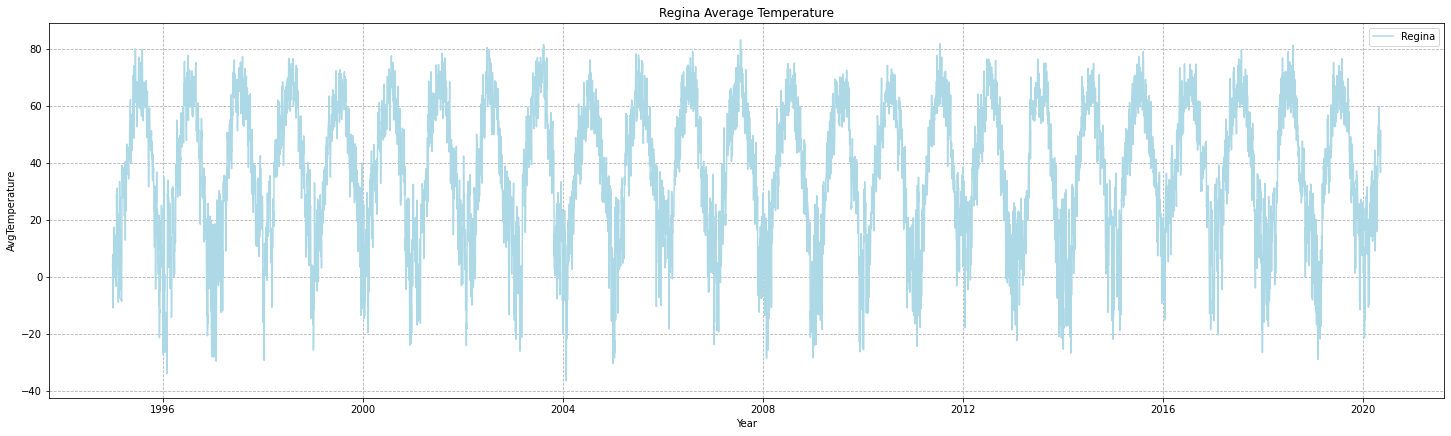

In [98]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,1)
plt.plot(Regina_data['Date'], Regina_data['AvgTemperature'], 'lightblue' ,label = 'Regina')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Regina Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

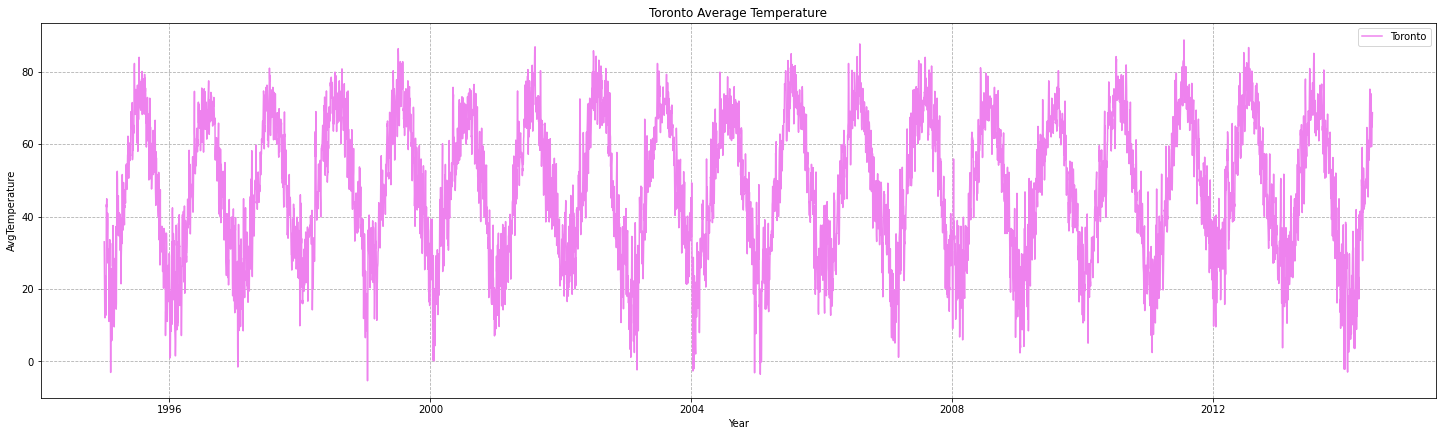

In [103]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,1)
plt.plot(Toronto_data['Date'], Toronto_data['AvgTemperature'], 'violet' ,label = 'Toronto')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Toronto Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

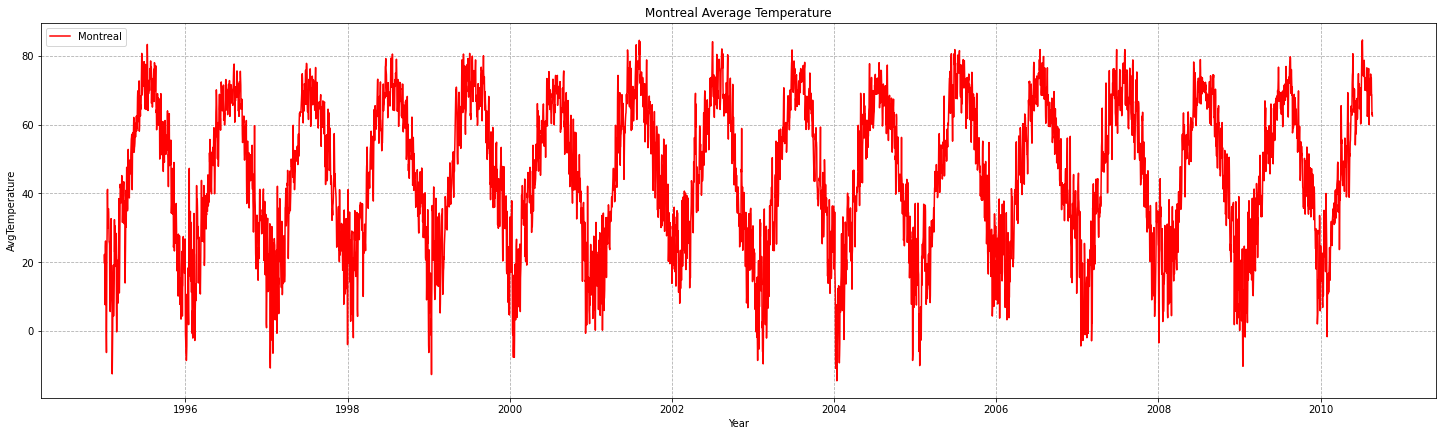

In [97]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,1)
plt.plot(Montreal_data['Date'], Montreal_data['AvgTemperature'], 'red' ,label = 'Montreal')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Montreal Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

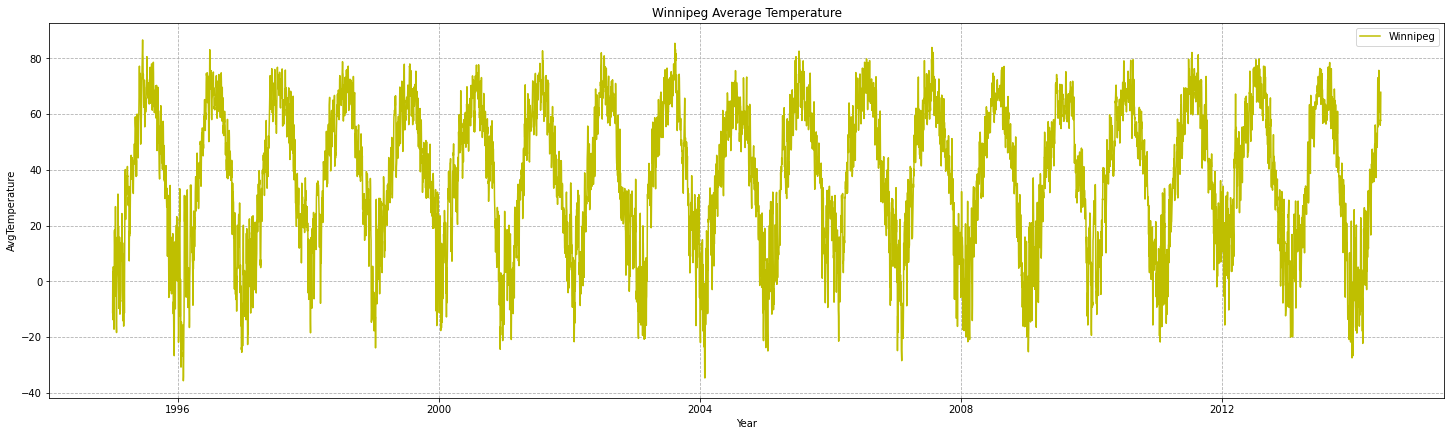

In [90]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,1)
plt.plot(Winnipeg_data['Date'], Winnipeg_data['AvgTemperature'], 'y' ,label = 'Winnipeg')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Winnipeg Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')


Text(0, 0.5, 'AvgTemperature')

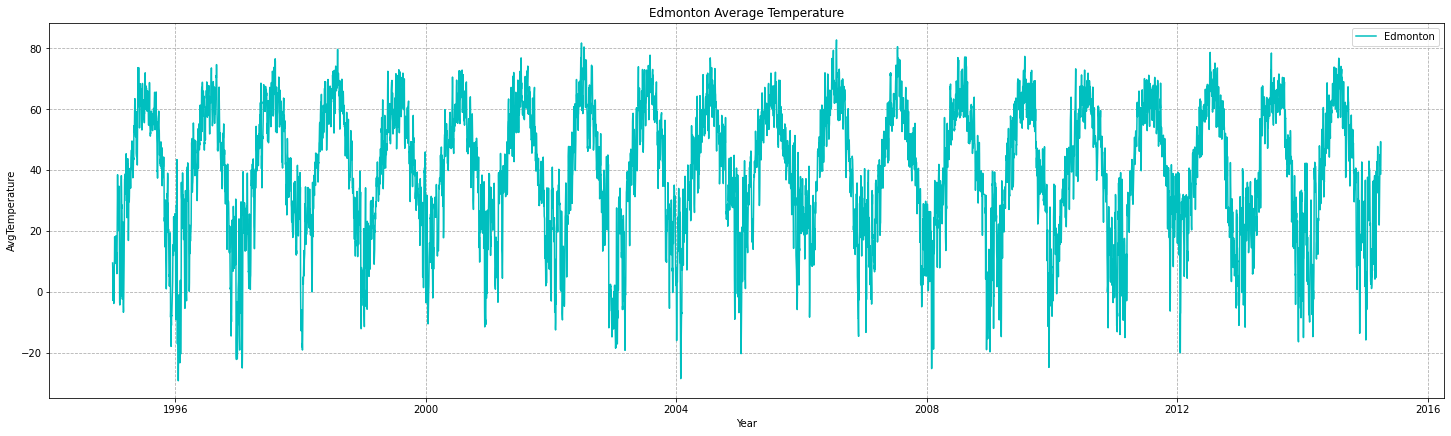

In [89]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,1)
plt.plot(Edmonton_data['Date'], Edmonton_data['AvgTemperature'], 'c' ,label = 'Edmonton')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Edmonton Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

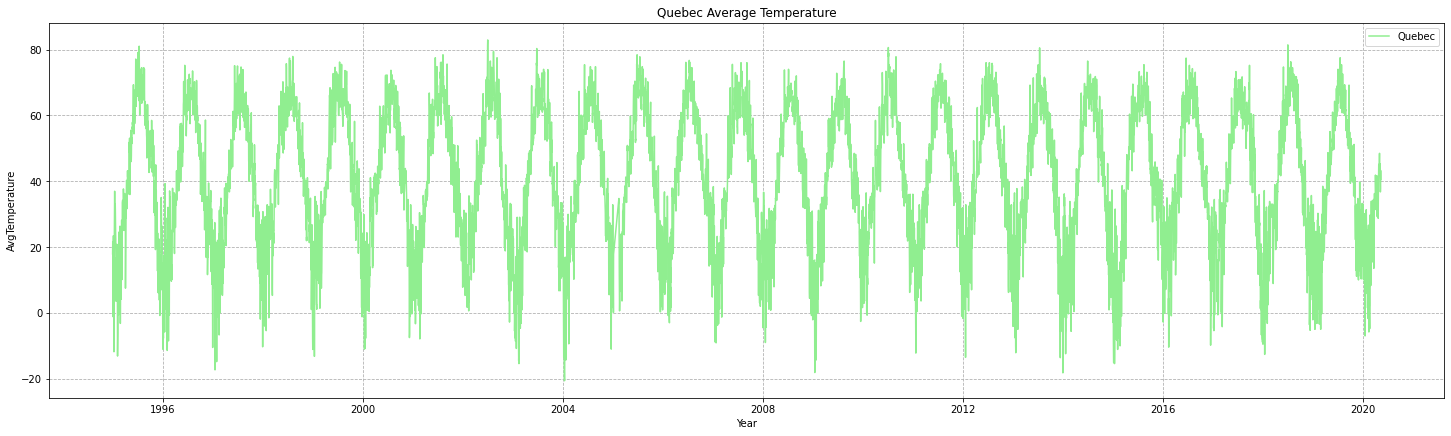

In [88]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,1)
plt.plot(Quebec_data['Date'], Quebec_data['AvgTemperature'], 'lightgreen' ,label = 'Quebec')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Quebec Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

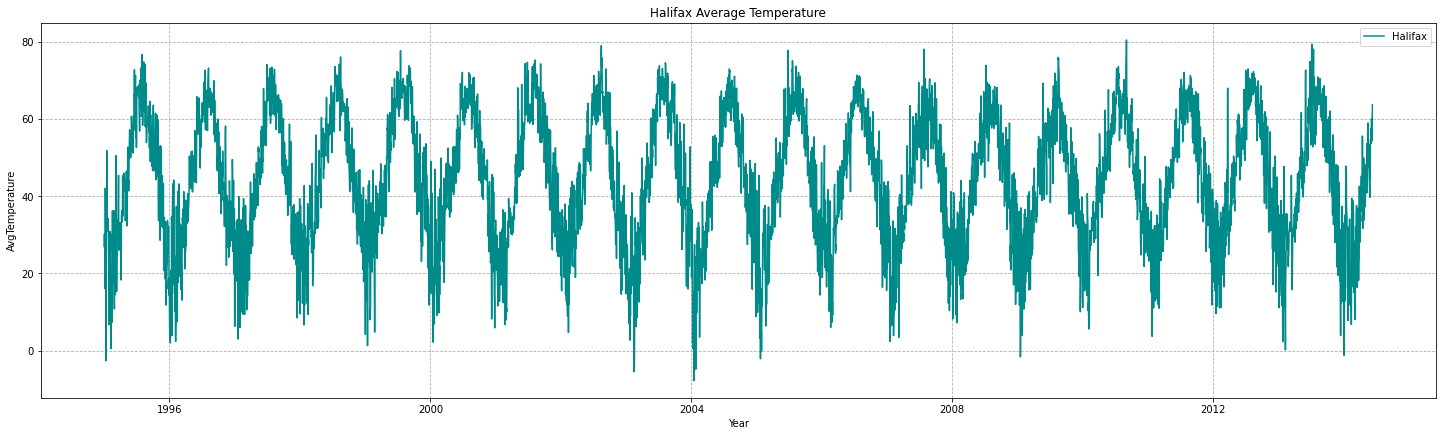

In [85]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,5)
plt.plot(Halifax_data['Date'], Halifax_data['AvgTemperature'], 'darkcyan' ,label = 'Halifax')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Halifax Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

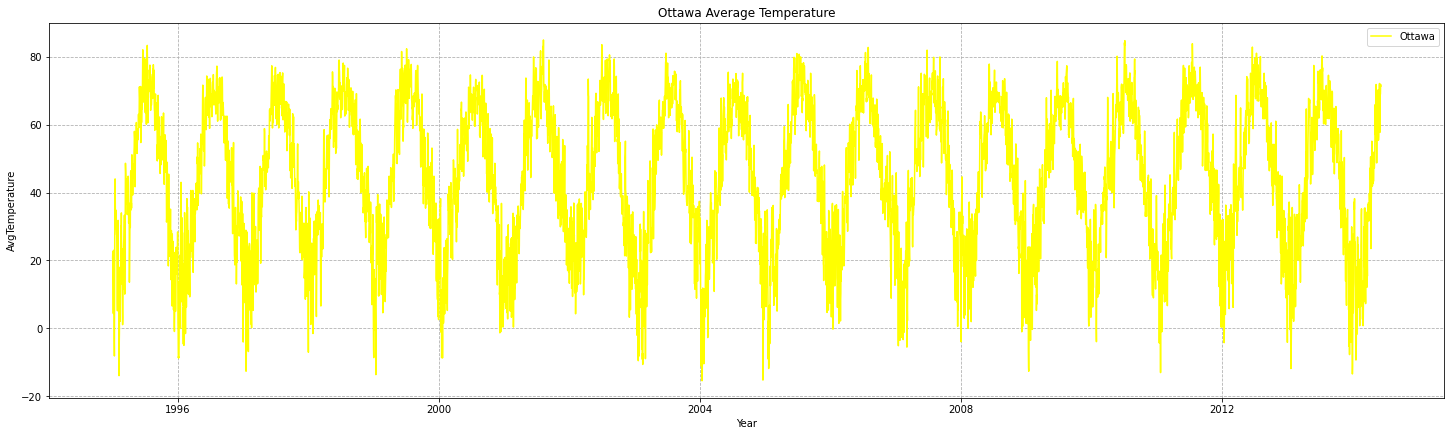

In [93]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,5)
plt.plot(Ottawa_data['Date'], Ottawa_data['AvgTemperature'], 'yellow' ,label = 'Ottawa')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Ottawa Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

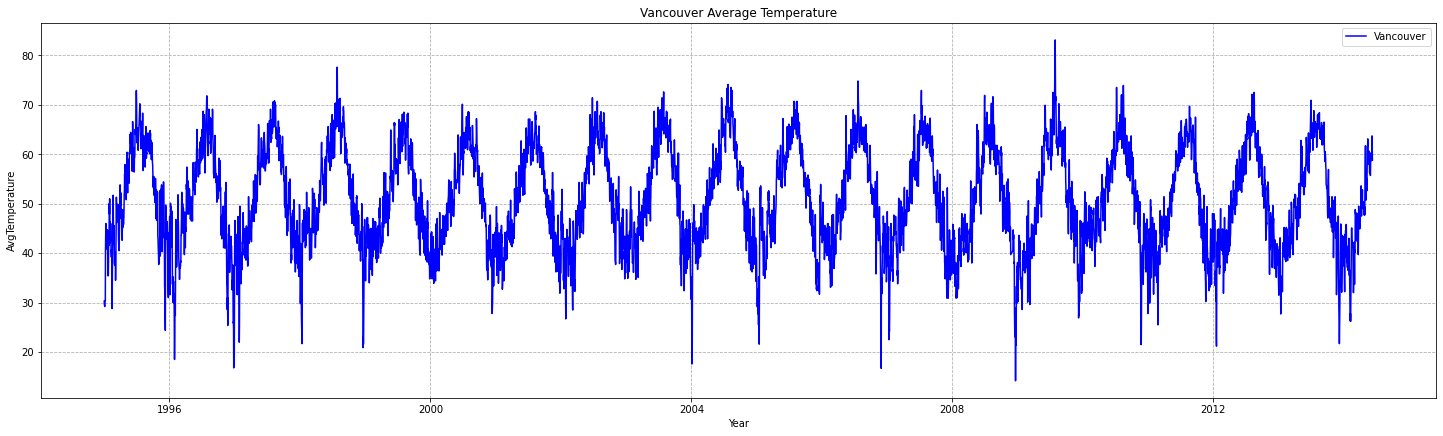

In [94]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,5)
plt.plot(Vancouver_data['Date'], Vancouver_data['AvgTemperature'], 'blue' ,label = 'Vancouver')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Vancouver Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

Text(0, 0.5, 'AvgTemperature')

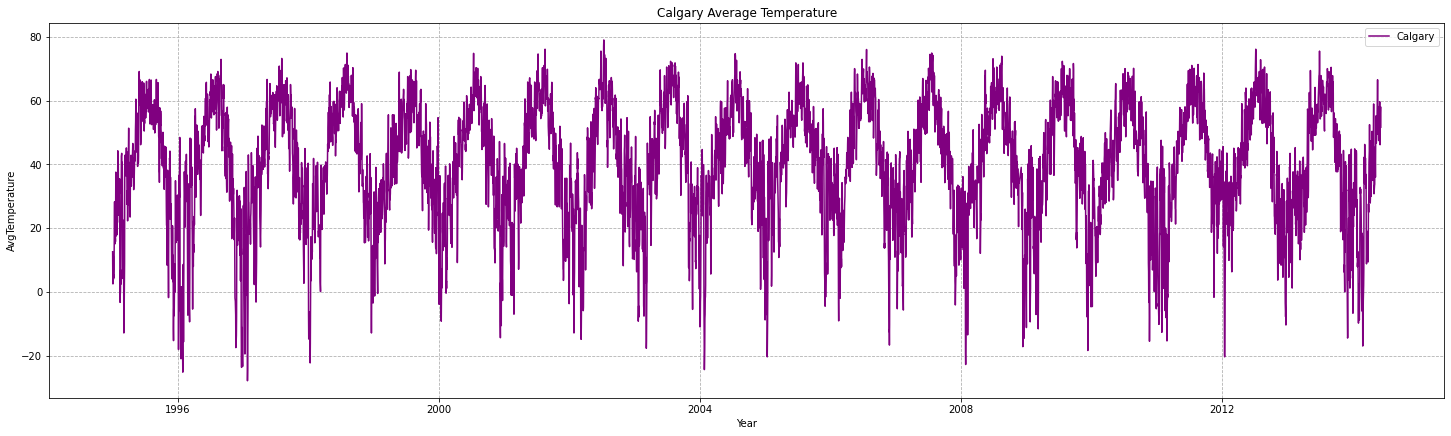

In [101]:
plt.figure(figsize = (25,40))
plt.subplot(5,1,5)
plt.plot(Calgary_data['Date'], Calgary_data['AvgTemperature'], 'purple' ,label = 'Calgary')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Calgary Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')